In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('remote_jobs.csv')

# Display first few rows
df.head()

,Title,Company,Tags,Date Posted
0,Senior Fullstack Software Engineer,Blotato,"Developer, JavaScript, Typescript, Heroku, AWS",2025-06-09T00:00:05+00:00


In [2]:
# Check shape
print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")

# Data types and non-null counts
df.info()

# Check for missing values
df.isnull().sum()


Total Rows: 1, Total Columns: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1 non-null      object
 1   Company      1 non-null      object
 2   Tags         1 non-null      object
 3   Date Posted  1 non-null      object
dtypes: object(4)
memory usage: 164.0+ bytes


Title          0
Company        0
Tags           0
Date Posted    0
dtype: int64

In [3]:
# Statistical summary (works mainly for numeric columns)
df.describe(include='all')


,Title,Company,Tags,Date Posted
count,1,1,1,1
unique,1,1,1,1
top,Senior Fullstack Software Engineer,Blotato,"Developer, JavaScript, Typescript, Heroku, AWS",2025-06-09T00:00:05+00:00
freq,1,1,1,1


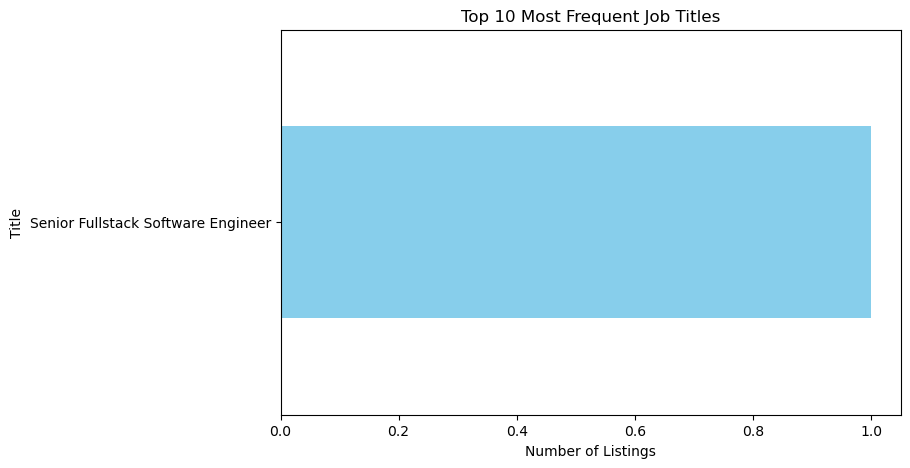

In [4]:
df['Title'].value_counts().head(10).plot(kind='barh', figsize=(8,5), color='skyblue')
plt.title('Top 10 Most Frequent Job Titles')
plt.xlabel('Number of Listings')
plt.gca().invert_yaxis()
plt.show()


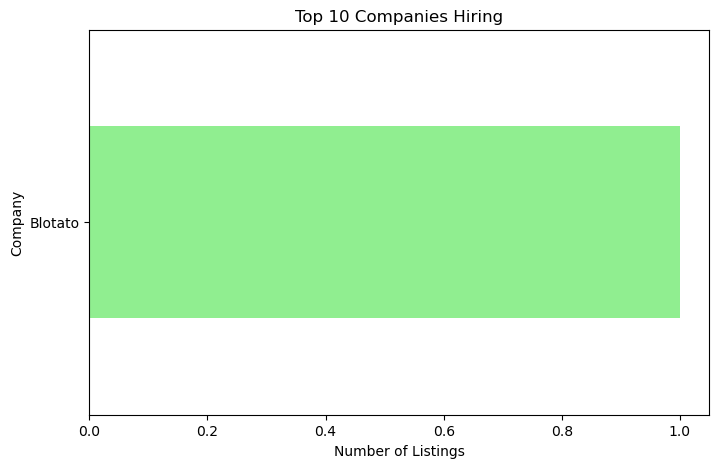

In [5]:
df['Company'].value_counts().head(10).plot(kind='barh', figsize=(8,5), color='lightgreen')
plt.title('Top 10 Companies Hiring')
plt.xlabel('Number of Listings')
plt.gca().invert_yaxis()
plt.show()


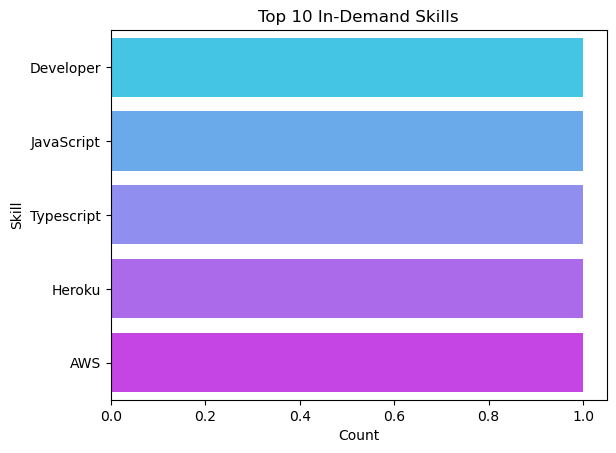

In [6]:
# Break all tags into individual skills
from collections import Counter

all_tags = ", ".join(df['Tags'].dropna()).split(", ")
tag_counts = Counter(all_tags)

# Convert to DataFrame for plotting
tags_df = pd.DataFrame(tag_counts.items(), columns=['Skill', 'Count'])
top_tags = tags_df.sort_values(by='Count', ascending=False).head(10)

sns.barplot(data=top_tags, x='Count', y='Skill', palette='cool')
plt.title('Top 10 In-Demand Skills')
plt.show()


In [8]:
df.to_csv('remote_jobs_cleaned.csv', index=False)
